# **Project 3 Report**

Nick Alvarez

CS458

## **P3-1. Revisit Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'].**

**(b) Build classifiers using the following methods:**
+ Support Vector Machine (sklearn.svm.LinearSVC)
+ Naive Bayes classifiers (sklearn.naive_bayes.MultinomialNB)
+ K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier)
+ Random forest (sklearn.ensemble.RandomForestClassifier)
+ AdaBoost classifier (sklearn.ensemble.AdaBoostClassifier)

**Optimize the hyperparameters of these methods and compare the results of these methods.**

In [ ]:
import numpy as np
from sklearn import datasets, model_selection, metrics
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# (a) load newsgroups
ng_train = datasets.fetch_20newsgroups(subset='train', categories=['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'], remove=('headers', 'footers', 'quotes'))
ng_test = datasets.fetch_20newsgroups(subset='test', categories=['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'], remove=('headers', 'footers', 'quotes'))

y1 = ng_train.target
y2 = ng_test.target

# (b) classifiers

max_depth_range = [None, 2, 5, 10]
min_samples_leaf_range = [1, 5, 10]
min_sample_split_range = [2, 10, 20]
min_leaf_nodes_range = [None, 5, 10, 20]

param_grid = {"clf__criterion": ['gini'],
              "clf__max_depth": [10],
              "clf__min_samples_leaf": [1, 5, 10],
              "clf__min_samples_split": [20],
              "clf__max_leaf_nodes": [None, 5, 10, 20]
              }

pipe_rf = Pipeline([('vect', TfidfVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier())])

Results_SVC_Penalty = {
  "l1" : 0,
  "l2" : 0
}

Results_Bayes_Alpha = {
  0.001 : 0,
  0.01 : 0,
  0.1 : 0
}

Results_KNN_Neighbors = {
  5 : 0,
  10 : 0,
  15 : 0
}

Results_Ada_LearningRate = {
  0.001 : 0,
  0.01 : 0,
  0.1 : 0,
  1.0 : 0
}

Results_Forest_Multiple = dict()

def trainMe(clf, Results, hyperparameter):
  print(f"Testing {str(clf)}")
  clf.fit(x1, y1)
  pred = clf.predict(x2)
  score = metrics.accuracy_score(y2, pred)
  Results[hyperparameter] = score

def runTests():
  # Support Vector Machine (LinearSVC)
  for hp in Results_SVC_Penalty:
    trainMe(LinearSVC(penalty=hp, tol=1e-3, dual=False), Results_SVC_Penalty, hp)

  # Naive Bayes (MultinomialNB)
  for hp in Results_Bayes_Alpha:
    trainMe(MultinomialNB(alpha=hp), Results_Bayes_Alpha, hp)

  # K-nearest Neighbors (KNeighborsClassifier)
  for hp in Results_KNN_Neighbors:
    trainMe(KNeighborsClassifier(n_neighbors=hp), Results_KNN_Neighbors, hp)

  # Random forest (RandomForestClassifier)
  print("Testing RandomForestClassifier(*)")
  grid = model_selection.GridSearchCV(estimator=pipe_rf, param_grid=param_grid, scoring='accuracy', refit=True, verbose=True)
  grid.fit(ng_train.data, ng_train.target)
  means = grid.cv_results_["mean_test_score"]
  for mean, params in zip(means, grid.cv_results_["params"]):
    Results_Forest_Multiple.update({str(params) : mean})

  # AdaBoost (AdaBoostClassifier)
  for hp in Results_Ada_LearningRate:
    trainMe(AdaBoostClassifier(learning_rate=hp), Results_Ada_LearningRate, hp)
  
def printDictReallyNice(d):
  for k,v in d.items():
    print(k, ' : ', v)

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english',)
x1 = vectorizer.fit_transform(ng_train.data)
x2 = vectorizer.transform(ng_test.data)

runTests()
print("\nFormat = Hyperparameter : Accuracy")
print(f'\nSupport Vector Machine\nHyperparameter: Penalty')
printDictReallyNice(Results_SVC_Penalty)
print(f'\nNaive Bayes\nHyperparameter: Smoothing (alpha)')
printDictReallyNice(Results_Bayes_Alpha)
print(f'\nK-nearest Neighbors\nHyperparameter: Number of Neighbors')
printDictReallyNice(Results_KNN_Neighbors)
print(f'\nRandom Forest\nHyperparameter: Max Depth, Min Samples Leaf, Min Samples Split, Min Leaf Nodes')
printDictReallyNice(Results_Forest_Multiple)
print(f'\nAdaBoost Classifier\nHyperparameter: Learning Rate')
printDictReallyNice(Results_Ada_LearningRate)

Discuss how you optimize the parameters of your decision tree here.

## **P3-2. Recognizing hand-written digits**

**(a) Develop a multi-layer perceptron classifier to recognize images of hand-written digits.**

**(b) Optimize the hyperparameters of your neural network to maximize the classification accuracy. Show the confusion matrix of your neural network. Discuss and compare your results with the results using a support vector classifier (see https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py).**

In [4]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# (a) build classifier
digits = datasets.load_digits()
x1, x2, y1, y2 = train_test_split(digits.data, digits.target, test_size=0.5)
good_clf = None

class Neural:
  def __init__(self, a):
    self.alpha = a
    self.clf = MLPClassifier(alpha=a)
    self.score = 0
  
  def update(self, s):
    self.score = s

Results_MLP_Alpha = {
  0.0001 : Neural(0.0001),
  0.001 : Neural(0.001),
  0.01 : Neural(0.01),
  0.1 : Neural(0.1)
}

Results_SVC_Gamma = {
  0.0001 : 0,
  0.001 : 0,
  0.01 : 0,
  0.1 : 0
}

def trainMe(clf, Results, hyperparameter):
  print(f"Testing {str(clf)}")
  clf.fit(x1, y1)
  pred = clf.predict(x2)
  score = metrics.accuracy_score(y2, pred)
  try:
    Results[hyperparameter].score = score
  except AttributeError:
    Results[hyperparameter] = score

def runTests():
  global good_clf

  # MLPClassifier
  max_score = 0
  for hp in Results_MLP_Alpha:
    trainMe(Results_MLP_Alpha[hp].clf, Results_MLP_Alpha, hp)
    if Results_MLP_Alpha[hp].score > max_score:
      max_score = Results_MLP_Alpha[hp].score
      good_clf = Results_MLP_Alpha[hp].clf

  # SVC
  for hp in Results_SVC_Gamma:
    trainMe(SVC(gamma=hp, tol=1e-3), Results_SVC_Gamma, hp)

def printDictReallyNice(d):
  for k,v in d.items():
    try:
      print(k, ' : ', v.score)
    except AttributeError:
      print(k, ' : ', v)

runTests()
print("\nFormat = Hyperparameter : Accuracy")
print(f'\nMulti-layer Perceptron\nHyperparameter: Regularization (alpha)')
printDictReallyNice(Results_MLP_Alpha)
print(f'\nSupport Vector Machine\nHyperparameter: Gamma')
printDictReallyNice(Results_SVC_Gamma)
print()
print(f"Using {str(good_clf)} as best NN...\n")
print(" -- Confusion Matrix of Neural Network --")
print(metrics.confusion_matrix(y2, good_clf.predict(x2)))

Testing MLPClassifier()
Testing MLPClassifier(alpha=0.001)
Testing MLPClassifier(alpha=0.01)
Testing MLPClassifier(alpha=0.1)
Testing SVC(gamma=0.0001)
Testing SVC(gamma=0.001)
Testing SVC(gamma=0.01)
Testing SVC(gamma=0.1)

Format = Hyperparameter : Accuracy

Multi-layer Perceptron
Hyperparameter: Regularization (alpha)
0.0001  :  0.9577308120133482
0.001  :  0.9721913236929922
0.01  :  0.9610678531701891
0.1  :  0.9666295884315906

Support Vector Machine
Hyperparameter: Gamma
0.0001  :  0.9599555061179088
0.001  :  0.9877641824249166
0.01  :  0.5439377085650723
0.1  :  0.08342602892102335

Using MLPClassifier(alpha=0.001) as best NN...

 -- Confusion Matrix of Neural Network --
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 94  0  0  0  0  0  0  1  0]
 [ 1  1 86  0  0  0  0  0  0  0]
 [ 0  0  0 88  0  0  0  1  2  0]
 [ 0  0  0  0 93  2  0  2  0  2]
 [ 0  0  0  0  1 95  1  0  0  0]
 [ 0  1  0  0  0  0 86  0  0  0]
 [ 0  0  0  1  1  0  0 84  0  1]
 [ 0  2  0  0  0  1  2  0 70  0]
 [ 0  1  0  0 

The multi-layer perceptron is clearly the better classifier for this situation. Accuracy hovers around 96% even after adjusting hyperparameter for regularization. Meanwhile, the Support Vector Machine is accurate at lower gamma values but loses accuracy significantly at higher values.

## **P3-3. Nonlinear Support Vector Machine**

**(a) Randomly generate the following 2-class data points.**

**(b) Develop a nonlinear SVM binary classifier (sklearn.svm.NuSVC).**

**(c) Plot these data points and the corresponding decision boundaries, which is similar to the figure in the slide 131 in Chapter 4.**

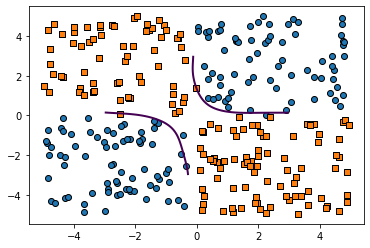

In [7]:
import numpy as np
from sklearn.svm import NuSVC
import matplotlib.pyplot as plt

# (a) generate 2-class data points
np.random.seed(0)
x = np.random.rand(300,2) * 10 - 5
y = np.logical_xor(x[:,0]>0, x[:,1]>0)

# (b) develop nonlinear SVM binary classifier
clf = NuSVC(gamma='auto')
clf.fit(x,y)

# (c) plot the decision boundaries
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

cont = plt.contour(xx, yy, z, linewidths=2, levels=[0])
plt.scatter(x[y == 0,0], x[y == 0,1], marker='o', cmap=plt.cm.bwr, edgecolors='k')
plt.scatter(x[y == 1,0], x[y == 1,1], marker='s', cmap=plt.cm.bwr, edgecolors='k')
plt.show()

The graph shows that the classifier is fairly acccurate in its decision boundaries. Only a few points are misclassified.